### Import Craigslist Housing Data

In [2]:
import pandas as pd

In [12]:
fp = 'craigslist.csv'
df = pd.read_csv(fp, header=1)

In [26]:
df.shape

(1177, 10)

In [13]:
df.head(1)

,url,post_id,post_date,description,num_beds,num_baths,price,address,sqft,features
0,https://sandiego.craigslist.org/csd/apa/d/san-...,7409829048,2021-11-18T15:35:15-0800,4 weeks free on 2 bedrooms4 weeks free on 1 be...,2,2,3395,1302 Frankfort St.,-1.0,"['EV charging', 'air conditioning', 'cats are ..."


Description
- post_id, post_date, description, num_beds, num_baths, price, address, sqft, features
- description is the most informative feature, but requires some natural language processing with advanced language models
- basic information that can be used directly consists of num_beds, num_baths, price, address, sqft, and features

In [17]:
from matplotlib import pyplot as plt

In [29]:
baths = df.num_baths.value_counts(normalize=True, dropna=False)
beds = df.num_beds.value_counts(normalize=True, dropna=False)

<BarContainer object of 9 artists>

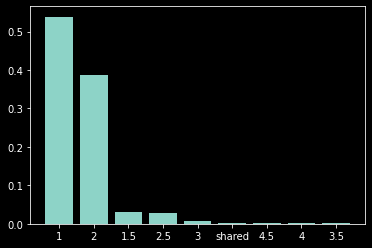

In [33]:
plt.bar(baths.index, baths)

- options for number of bathroom: 1,...,1.5,...,shared
- nearly all of the listings have 1 or 2 bathrooms 

<BarContainer object of 6 artists>

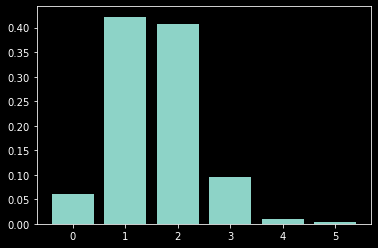

In [34]:
plt.bar(beds.index, beds)

- Bed rooms count started with 0 up to 5, with over 80 percent of the total instances being 1 and 2 bedroom listings  

In [55]:
df.price.mean()

18658.756159728124

In [56]:
df.price.std()

539213.8762338925

In [60]:
df.sqft.value_counts(normalize=True)

-1.0      0.733844
 700.0    0.017007
 850.0    0.016156
 600.0    0.013605
 650.0    0.011905
            ...   
 824.0    0.000850
 73.0     0.000850
 108.0    0.000850
 133.0    0.000850
 989.0    0.000850
Name: sqft, Length: 93, dtype: float64

- 70 percent of the total lists doesn't have a proper sqft result

(array([135., 309., 293., 170., 138.,  84.,  11.,  16.,  12.,   9.]),
 array([ 10.,  97., 184., 271., 358., 445., 532., 619., 706., 793., 880.]),
 <BarContainer object of 10 artists>)

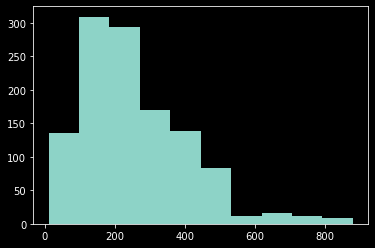

In [25]:
plt.hist(df.description.apply(lambda str: len(str.split())))

For the descriptions, most are around 200 words, with a few a bit more lengthy around 600 to 800 words

(array([ 91.,  91.,  49., 202., 249., 190., 223.,  52.,  26.,   4.]),
 array([  2. ,  27.6,  53.2,  78.8, 104.4, 130. , 155.6, 181.2, 206.8,
        232.4, 258. ]),
 <BarContainer object of 10 artists>)

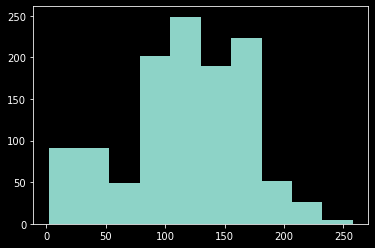

In [63]:
length = df.features.apply(lambda ft: len(ft))
plt.hist(length)

In [77]:
# available features
import numpy as np
features = set(np.concatenate(df.features.apply(lambda lst: eval(lst.strip())).to_list()).flat)